In [17]:
!pip install ta
!pip install yfinance

In [18]:
import math
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import ta
from sklearn.preprocessing import MinMaxScaler

In [19]:
np.random.seed(42)
tf.random.set_seed(42)

Setup of stocks and dates remains same for all the codes

In [20]:
tickers = ["AAPL", "MSFT", "GOOG", "^NSEI"]   # correct NSE Nifty 50 ticker

start_date = "2015-01-01"
end_date = "2025-01-01"


To create Sequences of 21

In [21]:
def create_seq(df, seq_len=21, target_col='Close'):
    values = df.values
    target = df[target_col].values  # target by name
    X, y = [], []
    for i in range(len(df) - seq_len):
        X.append(values[i:i+seq_len])
        y.append(target[i+seq_len])
    return np.array(X), np.array(y)


I have Kept the model as a seperate function, To modularize it if required we can easily replace LSTM with any other model

In [22]:
def build_lstm(input_shape):
    model = Sequential([
        tf.keras.Input(shape=input_shape),
        LSTM(50, return_sequences=True),   # first LSTM returns sequences
        Dropout(0.2),
        LSTM(50, return_sequences=False),  # second LSTM outputs last hidden state
        Dropout(0.2),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

Run function which will run for all different features

/tmp/ipython-input-2720973808.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, progress=False)


Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2015-01-02  24.261044  24.729267  23.821668  24.718171  212818400
2015-01-05  23.577578  24.110154  23.391177  24.030267  257142000
2015-01-06  23.579792  23.839422  23.218083  23.641926  263188400
2015-01-07  23.910433  24.010290  23.677430  23.788384  160423600
2015-01-08  24.829126  24.886823  24.121244  24.238856  237458000
Price        Open   High    Low  Close GannRes GannSup
Ticker       AAPL   AAPL   AAPL   AAPL    AAPL    AAPL
Date                                                  
2015-01-02  24.72  24.73  23.82  24.26   26.79   21.86
2015-01-05  24.03  24.11  23.39  23.58   26.07   21.21
2015-01-06  23.64  23.84  23.22  23.58   26.07   21.21
2015-01-07  23.79  24.01  23.68  23.91   26.42   21.53
2015-01-08  24.24  24.89  24.12  24.83   27.38   22.40
Datasets: Train: 1746, Val: 374,

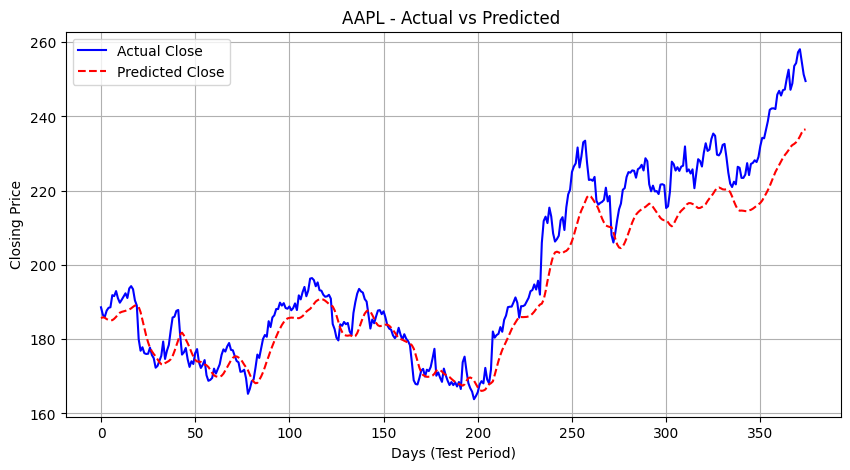

/tmp/ipython-input-2720973808.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, progress=False)


Price           Close       High        Low       Open    Volume
Ticker           MSFT       MSFT       MSFT       MSFT      MSFT
Date                                                            
2015-01-02  39.933048  40.496688  39.745170  39.847650  27913900
2015-01-05  39.565849  39.907448  39.497528  39.600007  39673900
2015-01-06  38.985126  39.924526  38.891186  39.608547  36447900
2015-01-07  39.480431  39.676850  38.848472  39.266931  29114100
2015-01-08  40.641872  40.778512  39.898893  39.924512  29645200
Price        Open   High    Low  Close GannRes GannSup
Ticker       MSFT   MSFT   MSFT   MSFT    MSFT    MSFT
Date                                                  
2015-01-02  39.85  40.50  39.75  39.93   43.16   36.84
2015-01-05  39.60  39.91  39.50  39.57   42.77   36.48
2015-01-06  39.61  39.92  38.89  38.99   42.17   35.93
2015-01-07  39.27  39.68  38.85  39.48   42.68   36.40
2015-01-08  39.92  40.78  39.90  40.64   43.89   37.52
Datasets: Train: 1746, Val: 374, Test: 3

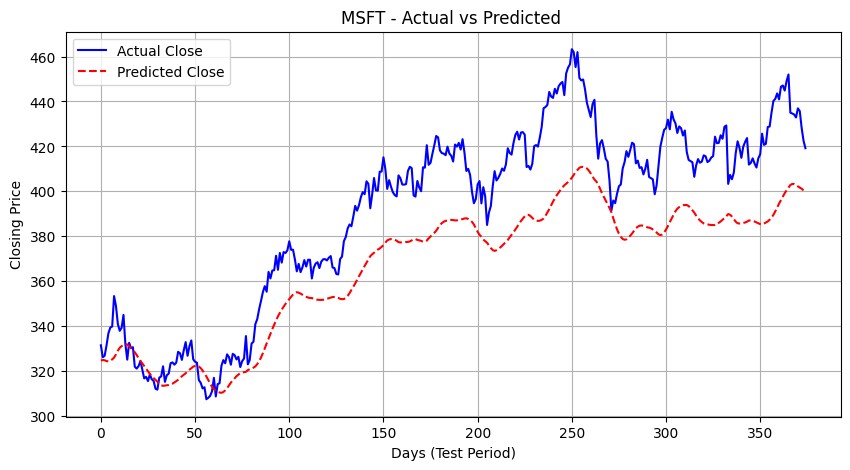

/tmp/ipython-input-2720973808.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, progress=False)


Price           Close       High        Low       Open    Volume
Ticker           GOOG       GOOG       GOOG       GOOG      GOOG
Date                                                            
2015-01-02  26.014023  26.334236  25.978830  26.222210  28951268
2015-01-05  25.471743  25.990229  25.431593  25.937190  41196796
2015-01-06  24.881380  25.585997  24.836274  25.527753  57998800
2015-01-07  24.838757  25.143305  24.766882  25.131210  41301082
2015-01-08  24.917074  24.956729  24.338114  24.684598  67071641
Price        Open   High    Low  Close GannRes GannSup
Ticker       GOOG   GOOG   GOOG   GOOG    GOOG    GOOG
Date                                                  
2015-01-02  26.22  26.33  25.98  26.01   28.63   23.53
2015-01-05  25.94  25.99  25.43  25.47   28.06   23.01
2015-01-06  25.53  25.59  24.84  24.88   27.44   22.45
2015-01-07  25.13  25.14  24.77  24.84   27.39   22.41
2015-01-08  24.68  24.96  24.34  24.92   27.48   22.48
Datasets: Train: 1746, Val: 374, Test: 3

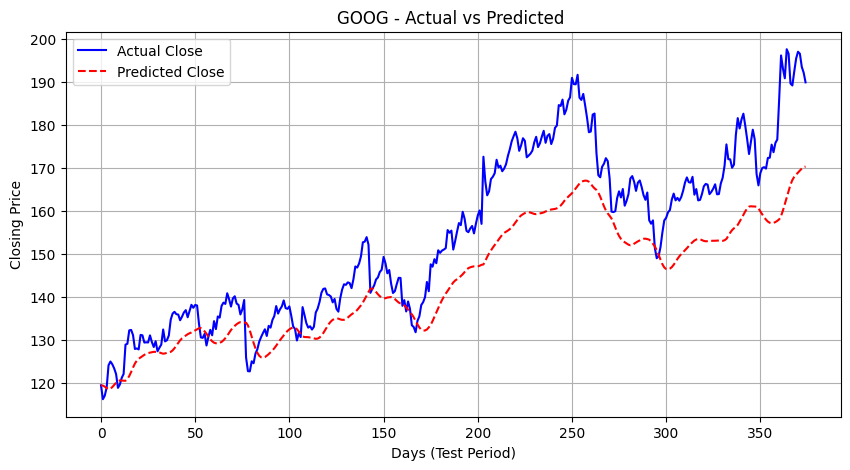

/tmp/ipython-input-2720973808.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, progress=False)


Price             Close         High          Low         Open  Volume
Ticker            ^NSEI        ^NSEI        ^NSEI        ^NSEI   ^NSEI
Date                                                                  
2015-01-02  8395.450195  8410.599609  8288.700195  8288.700195  101900
2015-01-05  8378.400391  8445.599609  8363.900391  8407.950195  118200
2015-01-06  8127.350098  8327.849609  8111.350098  8325.299805  172800
2015-01-07  8102.100098  8151.200195  8065.450195  8118.649902  164100
2015-01-08  8234.599609  8243.500000  8167.299805  8191.399902  143800
Price          Open     High      Low    Close  GannRes  GannSup
Ticker        ^NSEI    ^NSEI    ^NSEI    ^NSEI    ^NSEI    ^NSEI
Date                                                            
2015-01-02  8288.70  8410.60  8288.70  8395.45  8441.33  8349.70
2015-01-05  8407.95  8445.60  8363.90  8378.40  8424.23  8332.70
2015-01-06  8325.30  8327.85  8111.35  8127.35  8172.49  8082.34
2015-01-07  8118.65  8151.20  8065.45  810

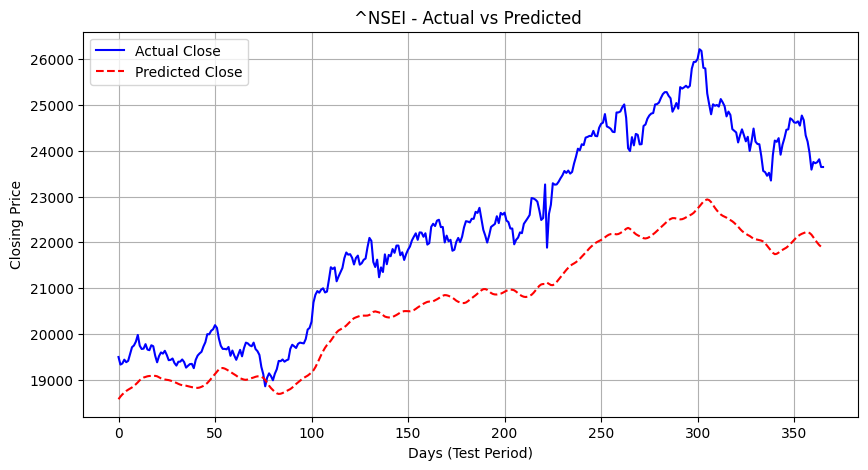

In [23]:
    for ticker in tickers:
      df = yf.download(ticker, start=start_date, end=end_date, progress=False)

      print(df.head())
      df = df.copy()
      def _gann_calc(price):
            p = float(price)
            root_price = np.sqrt(p)
            res = (root_price + 0.25) ** 2
            sup = (root_price - 0.25) ** 2
            return res, sup

        # Find the Close column dynamically
      close_cols = [col for col in df.columns if col[0] == 'Close']
      close_col = close_cols[0]  # Get first Close column
      ticker = close_col[1]  # Extract ticker name (AAPL, MSFT, etc.)

      gann_values = df[close_col].apply(_gann_calc)
      df[('GannRes', ticker)] = [x[0] for x in gann_values]
      df[('GannSup', ticker)] = [x[1] for x in gann_values]


      df = df[['Open', 'High', 'Low', 'Close','GannRes','GannSup']].round(2).dropna()
      print(df.head())

      scaler_X = MinMaxScaler()
      scaled_features = scaler_X.fit_transform(df)
      scaler_y = MinMaxScaler()
      scaled_close = scaler_y.fit_transform(df[['Close']])
      df_scaled = pd.DataFrame(scaled_features, index=df.index, columns=df.columns)
      X, y = create_seq(df_scaled)
      # After creating X, y
      n = len(X)
      train_end = int(n * 0.7)    # First 70% = training
      val_end   = int(n * 0.85)   # Next 15% = validation
                                  # Last 15% = test
      #chornological splitting of the data
      X_train, y_train = X[:train_end], y[:train_end]
      X_val, y_val     = X[train_end:val_end], y[train_end:val_end]
      X_test, y_test   = X[val_end:], y[val_end:]
      print(f"Datasets: Train: {len(X_train)}, Val: {len(X_val)}, Test: {len(X_test)}")

      model = build_lstm((21, X.shape[2]))
      early_stop = EarlyStopping(
          monitor='val_loss',
          patience=8,
          mode='min',
          restore_best_weights=True
      )

      history = model.fit(
          X_train, y_train,
          validation_data=(X_val, y_val),
          epochs= 50,
          batch_size= 32,
          shuffle=False,
          callbacks=[early_stop],
          verbose=0
      )
      pred_scaled = model.predict(X_test).ravel()
      pred = scaler_y.inverse_transform(pred_scaled.reshape(-1,1)).ravel()
      y_test = scaler_y.inverse_transform(y_test.reshape(-1,1)).ravel()
      rmse = math.sqrt(mean_squared_error(y_test, pred))
      mae = mean_absolute_error(y_test, pred)
      mape = mean_absolute_percentage_error(y_test, pred)
      r2 = r2_score(y_test, pred)
      print(f"{ticker} → RMSE: {rmse:.4f}, MAE: {mae:.4f}, MAPE: {mape:.4f}, R2: {r2:.4f}")

      plt.figure(figsize=(10,5))
      plt.plot(y_test, label="Actual Close", color='blue')
      plt.plot(pred, label="Predicted Close", color='red', linestyle='--')
      plt.title(f"{ticker} - Actual vs Predicted ")
      plt.xlabel("Days (Test Period)")
      plt.ylabel("Closing Price")
      plt.legend()
      plt.grid(True)
      plt.show()

In [24]:
print(X.shape[2])

6
